In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pylab as plt

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [65]:
from sklearn.metrics import mean_squared_error

In [8]:
df =  pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [10]:
# First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
# Restrict data
df_restricted = df[(df.ocean_proximity=="<1H OCEAN") | (df.ocean_proximity=="INLAND")]

In [12]:
df_restricted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [14]:
df_restricted = df_restricted.fillna(value=0)

In [16]:
df_restricted["median_house_value"] = np.log(df_restricted["median_house_value"])

In [22]:
df_restricted.reset_index(drop=True, inplace=True)

In [23]:
df_restricted

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973863,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287653,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419570,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554967,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287192,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265745,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,11.252859,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432799,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346871,INLAND


In [24]:
# Split data into train, validation and test sets
df_full_train, df_test = train_test_split(df_restricted, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [30]:
y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

df_train.drop(columns=["median_house_value"], inplace=True)
df_val.drop(columns=["median_house_value"], inplace=True)
df_test.drop(columns=["median_house_value"], inplace=True)


In [33]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
dv = DictVectorizer(sparse=False)

In [61]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient="records")
dict_test = df_test.to_dict(orient="records")

In [62]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

In [48]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

## Question 1: Train model with max_depth = 1

In [51]:
dt = DecisionTreeRegressor(max_depth=1)

In [52]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'X[6] <= 0.5\nsquared_error = 0.322\nsamples = 9411\nvalue = 12.011'),
 Text(0.25, 0.25, 'squared_error = 0.186\nsamples = 5487\nvalue = 12.301'),
 Text(0.75, 0.25, 'squared_error = 0.23\nsamples = 3924\nvalue = 11.607')]

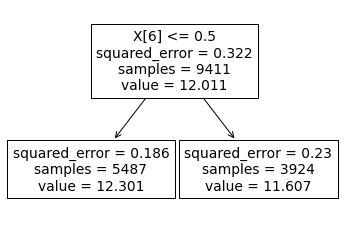

In [54]:
plot_tree(dt)

In [57]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [55]:
from sklearn.tree import export_text

In [56]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.30]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



d:\Anacoda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 2: Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

In [58]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [59]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [63]:
y_val_pred = rf.predict(X_val)

In [64]:
y_val_pred

array([12.25506827, 12.07467659, 11.59777905, ..., 11.72981962,
       11.24840573, 11.64112568])

In [68]:
np.sqrt(mean_squared_error(y_val, y_val_pred))

0.24539096223542625

## Question 3
Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

In [69]:
lst_estimator = range(10, 201, 10)

In [72]:
lst_RMSE = []
for n_estimator in lst_estimator:
    rf = RandomForestRegressor(n_estimators=n_estimator, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)
    lst_RMSE.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    

In [75]:
np.round(lst_RMSE, 3)

array([0.245, 0.239, 0.237, 0.235, 0.235, 0.235, 0.235, 0.235, 0.234,
       0.234, 0.234, 0.234, 0.234, 0.234, 0.234, 0.233, 0.233, 0.234,
       0.234, 0.234])

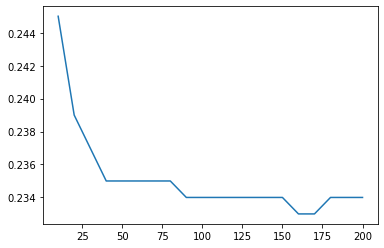

In [76]:
plt.plot(list(lst_estimator), np.round(lst_RMSE, 3))

## Question 4
Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE
- Fix the random seed: random_state=1

In [77]:
max_depth = [10, 15, 20, 25]

In [79]:
lst_RMSE = []
for depth in max_depth:
    for n_estimator in lst_estimator:
        rf = RandomForestRegressor(n_estimators=n_estimator, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_val_pred = rf.predict(X_val)
        lst_RMSE.append((depth, n_estimator, np.sqrt(mean_squared_error(y_val, y_val_pred))))

In [81]:
df_result_depth = pd.DataFrame(lst_RMSE, columns=["depth", "n_estimators", "RMSE"])

In [84]:
df_result_depth.sort_values(by="RMSE", ascending=True)
# Result 20

,depth,n_estimators,RMSE
55,20,160,0.232994
56,20,170,0.233037
54,20,150,0.233109
53,20,140,0.233118
57,20,180,0.233279
...,...,...,...
8,10,90,0.245530
7,10,80,0.245668
2,10,30,0.246326
1,10,20,0.247365


## Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In [86]:
n_estimator = 10
depth = 20
random_state = 1
n_jobs = -1

In [87]:
rf = RandomForestRegressor(n_estimators=n_estimator, max_depth=depth, random_state=random_state, n_jobs=n_jobs)

In [88]:
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)

In [89]:
rf.feature_importances_

array([0.01455543, 0.03032307, 0.1015149 , 0.08709334, 0.33574968,
       0.03529711, 0.33098244, 0.02834515, 0.01515447, 0.0209844 ])

In [90]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [ ]:
# The most important feature is media_income